MANN KENDALL TEST

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
dfVellore=pd.read_csv(r"C:\Users\Avaneesh Koushik\OneDrive - SSN Trust\IFP\Trend analysis\vellore_rainfall.csv")
dfKanchi=pd.read_csv(r"C:\Users\Avaneesh Koushik\OneDrive - SSN Trust\IFP\Trend analysis\kanchi_rainfall.csv")
dfRanipet=pd.read_csv(r"C:\Users\Avaneesh Koushik\OneDrive - SSN Trust\IFP\Trend analysis\ranipet_rainfall.csv")

In [3]:
def sgn(a):
    if(a>0):
        return 1
    elif(a==0):
        return 0
    else:
        return -1

In [4]:
max_annual_rain=dfVellore.groupby("Year")["RF in mm"].max()
length=max_annual_rain.size
rainfall=list(max_annual_rain.iloc[:])
print(rainfall)

[113.0, 87.0, 202.0, 133.0, 109.2, 160.0, 140.0, 129.0, 94.0, 102.2, 105.4, 130.4, 106.0, 137.6, 144.2, 169.2, 145.0, 127.0, 128.0, 130.4, 118.0, 117.0, 191.6, 155.0, 127.0, 165.0, 165.7, 150.0, 110.2, 76.1]


In [5]:
S=0.0
highest=max_annual_rain.index
n=max_annual_rain.size
for i in range(0,n-1):
    for j in range(i+1,n):
        S+=sgn(rainfall[j]-rainfall[i])
print(S)

49.0


In [6]:
def calcS(rainData):
    S=0.0
    rainfall=list(rainData.iloc[:])
    highest=rainData.index
    n=rainData.size
    for i in range(0,n-1):
        for j in range(i+1,n):
            S+=sgn(rainfall[j]-rainfall[i])
    return S

In [7]:
def Var(S,rainfall):
    sterm=0
    n=len(rainfall)
    term=0
    l=[]
    for i in range(0,n-1):
        c=rainfall.count(rainfall[i])
        if c>1:
            l.append(i)
    for j in range(len(l)):
        c=rainfall.count(rainfall[l[j]])
        term=term+(c*j*(j-1)*(2*j+5))
    var=n*(n-1)*(2*n+5)-term
    return var/18

In [8]:
print(Var(S,rainfall))

3132.3333333333335


In [9]:
for i in range(0,n-1):
    c=rainfall.count(rainfall[i])
    #print(c)
len(rainfall)

30

In [10]:
m=len(set(max_annual_rain))
max_annual_rain

Year
1993    113.0
1994     87.0
1995    202.0
1996    133.0
1997    109.2
1998    160.0
1999    140.0
2000    129.0
2001     94.0
2002    102.2
2003    105.4
2004    130.4
2005    106.0
2006    137.6
2007    144.2
2008    169.2
2009    145.0
2010    127.0
2011    128.0
2012    130.4
2013    118.0
2014    117.0
2015    191.6
2016    155.0
2017    127.0
2018    165.0
2019    165.7
2020    150.0
2021    110.2
2022     76.1
Name: RF in mm, dtype: float64

In [11]:
d=dict()
yearF=max_annual_rain.index[0]
for i in range(n):
    k=float(max_annual_rain.iloc[i:i+1])
    if k in d:
        d[k]+=1
    else:
        d[k]=1
d    

C:\Users\Avaneesh Koushik\AppData\Local\Temp\ipykernel_26248\2831698262.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  k=float(max_annual_rain.iloc[i:i+1])


{113.0: 1,
 87.0: 1,
 202.0: 1,
 133.0: 1,
 109.2: 1,
 160.0: 1,
 140.0: 1,
 129.0: 1,
 94.0: 1,
 102.2: 1,
 105.4: 1,
 130.4: 2,
 106.0: 1,
 137.6: 1,
 144.2: 1,
 169.2: 1,
 145.0: 1,
 127.0: 2,
 128.0: 1,
 118.0: 1,
 117.0: 1,
 191.6: 1,
 155.0: 1,
 165.0: 1,
 165.7: 1,
 150.0: 1,
 110.2: 1,
 76.1: 1}

In [8]:
# s=0
# for i in d:
#     if d[i]==2:
#         s+=()

In [12]:
def zmk(S):
    if S>0:
        return (S-1)/(np.sqrt(Var(S,rainfall)))
    elif S==0:
        return S
    else:
        return (S+1)/(np.sqrt(Var(S,rainfall)))

In [13]:
zmk(S)

0.8576443902812568

In [14]:
#Z-test
z_table={1:2.58,5:1.96,10:1.645}
def z_test(z,los=5):
    if z<=z_table[los]:
        print("H0 accpeted")
    elif z>z_table[los]:
        print("H0 rejected")


In [15]:
z_test(zmk(S))

H0 accpeted


In [16]:
def median(arr):
    n=len(arr)
    if n%2==0:
        return (arr[n/2]+arr[1+n/2])/2
    else:
        return arr[n//2+1]

In [20]:
#Theil–Sen approach (TSA)
def tsa(rainfall):
    arr=[]
    tot=0
    for i in range(0,n-1):
        for j in range(i+1,n):
            arr.append((rainfall[j]-rainfall[i])/j-i)
    return median(arr)

In [21]:
tsa(rainfall)

-5.3478260869565215

<!-- class TSreg():
    def __init__(self,data):
        self.data=data
    
    def fit(self,x,y):
         -->

Theil-Sen slope

In [26]:
import numpy as np
from scipy.stats import theilslopes


In [28]:
# Sample data (replace with your data)
data = {'year': [i for i in range(1992,2022)], #for vellore
        'rainfall': rainfall}
df = pd.DataFrame(data)


In [29]:
slope, intercept, low, high = theilslopes(df['rainfall'], df['year'])
print("Slope:", slope)
print("Intercept:", intercept)
print("Confidence interval:", (low, high))


Slope: 0.8100000000000002
Intercept: -1495.5650000000003
Confidence interval: (-0.8571428571428571, 2.0)


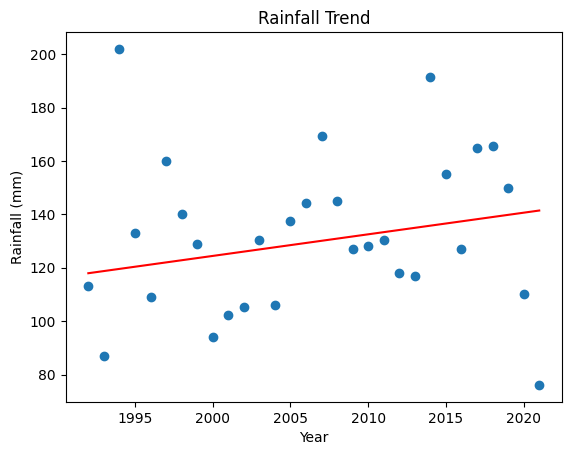

In [30]:
import matplotlib.pyplot as plt

# Plot the data and trend line
plt.scatter(df['year'], df['rainfall'])
plt.plot(df['year'], slope * df['year'] + intercept, color='red')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Trend')
plt.show()


In [31]:
import numpy as np
from scipy.stats import theilslopes

# Assuming you have the slope and intercept from previous calculations

future_years = np.arange(2020, 2025)
predicted_rainfall = slope * future_years + intercept

print(predicted_rainfall)


[140.635 141.445 142.255 143.065 143.875]


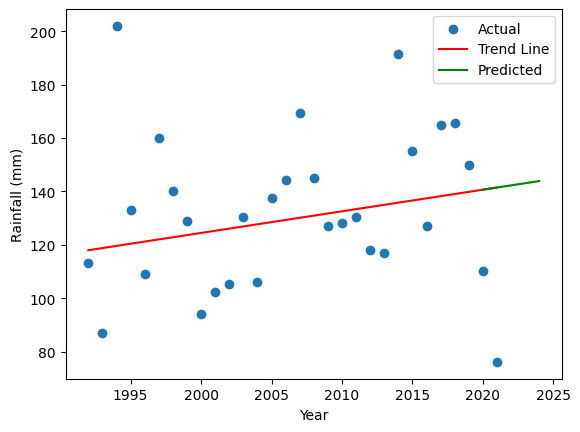

In [32]:
import matplotlib.pyplot as plt

plt.scatter(df['year'], df['rainfall'], label='Actual')
plt.plot(df['year'], slope * df['year'] + intercept, color='red', label='Trend Line')
plt.plot(future_years, predicted_rainfall, color='green', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.show()


In [22]:
from sklearn.linear_model import TheilSenRegressor
from sklearn.datasets import make_regression
X, y = make_regression(
    n_samples=200, n_features=2, noise=4.0, random_state=0)
reg = TheilSenRegressor(random_state=0).fit(X, y)
reg.score(X, y)
reg.predict(X[:1,])

array([-31.5871096])

In [25]:
X

array([[-0.955945  , -0.34598178],
       [-1.22543552,  0.84436298],
       [-0.69204985,  1.53637705],
       [ 0.01050002,  1.78587049],
       [-0.89546656,  0.3869025 ],
       [ 0.8644362 , -0.74216502],
       [ 0.39600671, -1.09306151],
       [ 0.76103773,  0.12167502],
       [ 0.74718833, -1.18894496],
       [ 0.2799246 , -0.09815039],
       [ 0.46566244, -1.53624369],
       [-0.63743703, -0.39727181],
       [-0.70470028,  0.94326072],
       [-1.00021535, -1.5447711 ],
       [ 1.86755896,  0.90604466],
       [-0.4555325 ,  0.01747916],
       [-2.25556423, -1.02250684],
       [-1.15735526, -0.31229225],
       [ 0.78632796, -0.4664191 ],
       [-1.30652685,  1.65813068],
       [ 0.09772497,  0.58295368],
       [ 1.92294203,  1.48051479],
       [-0.69456786, -0.14963454],
       [-0.80340966, -0.68954978],
       [ 0.14404357,  1.45427351],
       [-1.14746865, -0.43782004],
       [-0.90729836,  0.0519454 ],
       [-0.03928282, -1.1680935 ],
       [-0.26800337,

In [20]:
X, y = [i for i in range(1992,2023)],rainfall
reg = TheilSenRegressor(random_state=0).fit(X, y)
reg.score(X, y)
reg.predict(X[:1,])

ValueError: Expected 2D array, got 1D array instead:
array=[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [18]:
rainfall

[113.0,
 87.0,
 202.0,
 133.0,
 109.2,
 160.0,
 140.0,
 129.0,
 94.0,
 102.2,
 105.4,
 130.4,
 106.0,
 137.6,
 144.2,
 169.2,
 145.0,
 127.0,
 128.0,
 130.4,
 118.0,
 117.0,
 191.6,
 155.0,
 127.0,
 165.0,
 165.7,
 150.0,
 110.2,
 76.1]

In [19]:
2022-30

1992

CORRELATION AND AUTO CORRELATION
Linear Regression

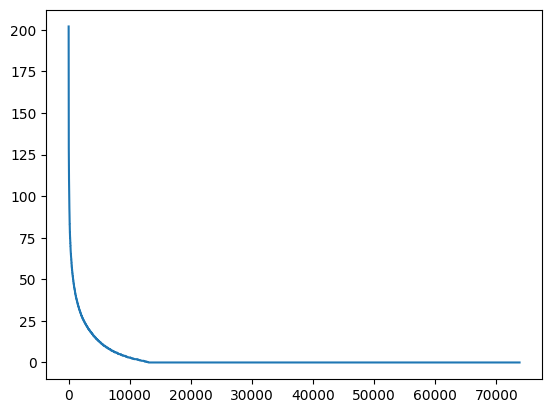

In [12]:
rainfall=dfVellore["RF in mm"]
plt.plot(rainfall)
plt.show()

In [14]:
rainf=rainfall.iloc[0:365]
days=np.arange(365)

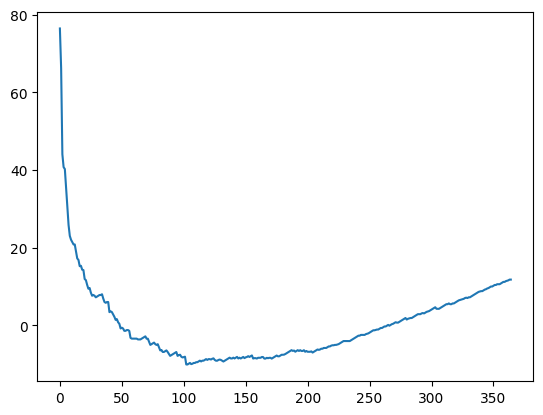

In [15]:

def rainError(days,rain,intercept,slope):
    estimates=intercept+slope*days
    rain_error=rain-estimates
    return rain_error
slope,intercept=np.polyfit(days,rainf,1)
rain_er=rainError(days,rainf,intercept,slope)
rain_er.plot()
plt.show()

FROM NEW RESEARCH PAPER

In [9]:
#Function for TAU
def tau(S,N):
    return (S/((N*(N-1))/2))
tau(S,len(rainfall))

0.11264367816091954

In [10]:
def medn(arr):
    if len(arr)%2==0:
        return (arr[len(arr)//2]+arr[(len(arr)+2)//2])/2
    else:
        return (arr[(len(arr)+2)//2])

In [11]:
def senSlope(max_annual_rain):
    rainfall=list(max_annual_rain.iloc[:])
    n=max_annual_rain.size
    arr=[]
    for i in range(0,n-1):
        for j in range(i+1,n):
            arr.append((rainfall[j]-rainfall[i])/(j-i))
    #print(arr)
    return medn(arr)
print(senSlope(max_annual_rain))

4.066666666666666


In [27]:
def percentChange(sens,rainfall):
    return float(sens*len(rainfall)*100)/(pd.DataFrame(rainfall).mean())[0]
print(percentChange(4.066666666666666,rainfall))

92.23325437225948


Kendall's Tau

Tau=C-D/C+D

ARIMA

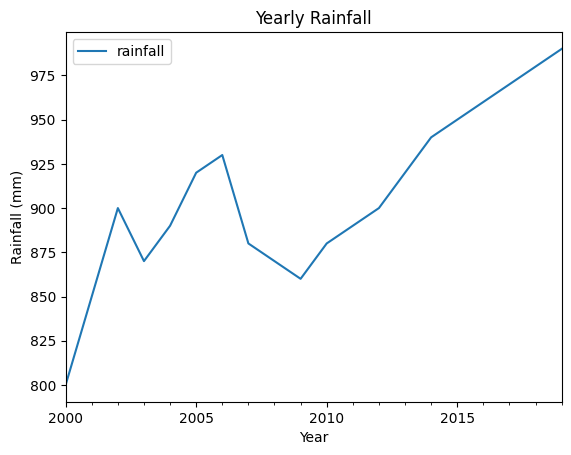

ADF Statistic: 1.5519861442799874
p-value: 0.9977061362840983


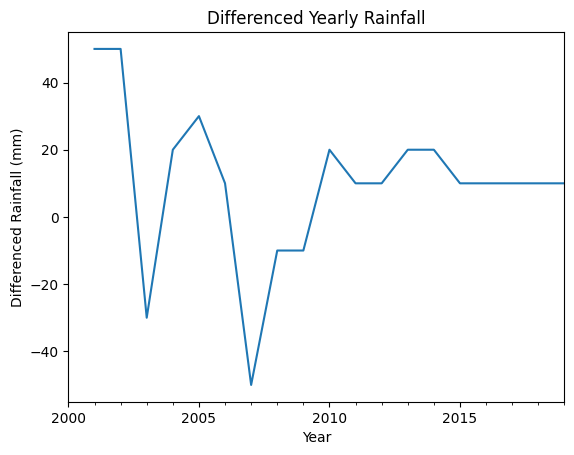

c:\Users\Avaneesh Koushik\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Avaneesh Koushik\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Avaneesh Koushik\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Avaneesh Koushik\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible sta

                               SARIMAX Results                                
Dep. Variable:          rainfall_diff   No. Observations:                   19
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -83.529
Date:                Sun, 28 Jul 2024   AIC                            173.058
Time:                        07:47:06   BIC                            175.729
Sample:                    01-01-2001   HQIC                           173.426
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2196      0.713      0.308      0.758      -1.178       1.618
ma.L1         -0.9998    296.734     -0.003      0.997    -582.587     580.587
sigma2       546.2175   1.62e+05      0.003      0.9

c:\Users\Avaneesh Koushik\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


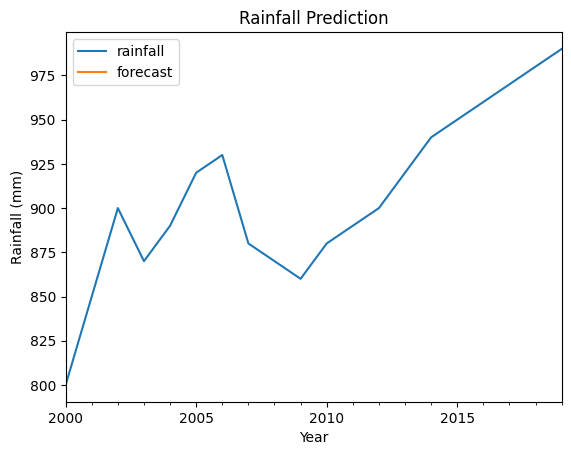

c:\Users\Avaneesh Koushik\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Avaneesh Koushik\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Avaneesh Koushik\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\Avaneesh Koushik\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeE

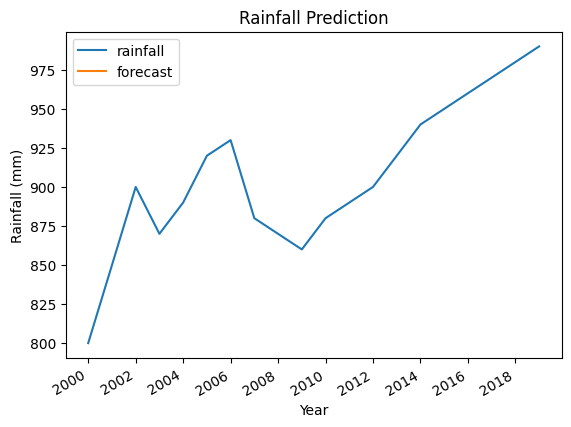

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

# Step 1: Load the data
data = {
    'year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'rainfall': [800, 850, 900, 870, 890, 920, 930, 880, 870, 860, 880, 890, 900, 920, 940, 950, 960, 970, 980, 990]
}
df = pd.DataFrame(data)

# Step 2: Convert 'year' to datetime format and set as index
df['year'] = pd.to_datetime(df['year'], format='%Y')
df.set_index('year', inplace=True)

# Step 3: Plot the data
df.plot()
plt.title('Yearly Rainfall')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.show()

# Step 4: Check for stationarity
result = adfuller(df['rainfall'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
# If p-value > 0.05, data is non-stationary

# Differencing to make the data stationary
df['rainfall_diff'] = df['rainfall'].diff().dropna()
df['rainfall_diff'].plot()
plt.title('Differenced Yearly Rainfall')
plt.xlabel('Year')
plt.ylabel('Differenced Rainfall (mm)')
plt.show()

# Step 5: Fit the ARIMA model
model = ARIMA(df['rainfall_diff'].dropna(), order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

# Step 6: Make predictions
df['forecast'] = model_fit.predict(start=len(df), end=len(df)+5, typ='levels')
df[['rainfall', 'forecast']].plot()
plt.title('Rainfall Prediction')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.show()

# Extend the date range for future years
future_years = pd.date_range(start='2020', periods=6, freq='Y')
df_future = pd.DataFrame(index=future_years, columns=df.columns)
df_forecast = pd.concat([df, df_future])

# Fit model again to include predictions in future years
model = ARIMA(df['rainfall'], order=(1,1,1))
model_fit = model.fit()
df_forecast['forecast'] = model_fit.predict(start=len(df), end=len(df)+5, typ='levels')

# Plot the original data and the forecast
df_forecast[['rainfall', 'forecast']].plot()
plt.title('Rainfall Prediction')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.show()
